# Definition of the projet : Forest Cover

### Purpose :
The project under consideration is an application of machine learning tools to a forest cover project in the United States. In this project, we are attempting to implement a classifier that will allow us to know the different types of forests in certain areas based on data from a single map.

### Metric :
With an accuracy metric, we want to predict with a precision of 0.9 without overfitting

In [ ]:
#importation of useful labraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,242642,2881,130,22,210,54,1020,250,221,88,...,0,0,0,0,0,0,0,0,0,1
1,309891,3005,351,14,242,-16,1371,194,215,159,...,0,0,0,0,0,0,0,0,0,1
2,287847,3226,63,14,618,2,1092,232,210,107,...,0,0,0,0,0,0,0,0,0,1
3,516307,3298,317,8,661,60,752,198,233,174,...,0,0,0,0,0,0,0,0,0,1
4,124860,3080,35,6,175,26,3705,219,227,144,...,0,0,0,0,0,0,0,0,0,1


# 1- Exploratory Data Analysis

## Purpose:

* Understand our data as well as possible
* Develop an initial modelling strategy

## 1.1- Checklist de base

### Form analysis : 

* Target variable: Cover_Type
* Rows and columns: (15120, 56)
* Types of variables : 
    - Quantitative: 10, qualitative: 2 divided into 44 columns. 
    It seems that the data have already been partially processed, all variables are integer. 
    - We distinguish between quantitative variables giving the geographical characteristics of the places, the type of wilderness of the spaces, and qualitative variables giving the type of soils in relation to the type of climate and the geology aspect.


* Missing values analysis : Good news we have no missing data, and a lot of data (from pre-processing), our prediction should be quite accurate.

### Background analysis : 

* Visualisation of the target: in the trainset, all the data are distributed in an equitable way, this information is important in the choice of the split for the training of the model, (we must split so as to keep almost the same proportions) a cross-validation will allow us in particular to be safe.


* Significance of the variables: 
    - The quantitative variables are standardised, so we can make a normalisation at the pre-processing level
    - Several soils have a very low proportion of presence: so perhaps they can be re-stretched for analysis? 
    
    An analysis of the target/variable relationships will convince us of this. 
    
    Soil 15 has no proportion of presence so it can be retreated, in general, soil types have a low proportion but occupy a large volume of features in the dataset, this can guide our pre-processing.
    
    
* Variable/target relationships: 
    - Quantitative variables/target: Elevation is the variable that best distinguishes forest cover types, distances to Hydrology seem not to best distinguish classes.
    - Wildness/ target: Wildness 2 is less present in most forest types.
    - Soils/ target: In general, some soil types are very little related to forest cover types.


### Form analysis

In [ ]:
df = data.copy()
df.shape

(15120, 56)

In [ ]:
df.dtypes

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

In [ ]:
# the types of variables in our dataset
df.dtypes.value_counts()

int64    56
dtype: int64

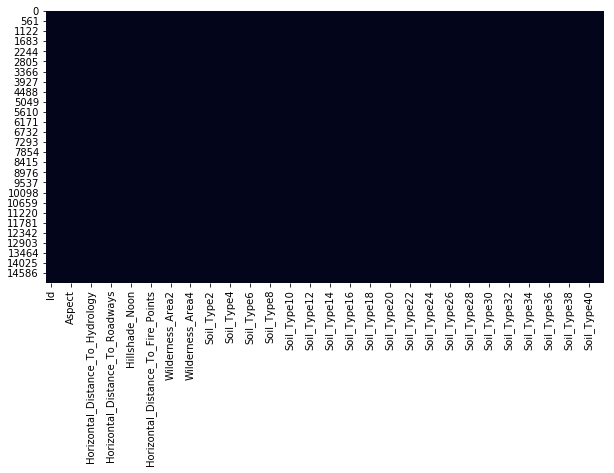

In [ ]:
# a small analisis on the missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isna(), cbar = False)
plt.show()

## Background analysis

### 1- initial viewing - target review

In [ ]:
df['Cover_Type'].value_counts(normalize=True)

7    0.142857
6    0.142857
5    0.142857
4    0.142857
3    0.142857
2    0.142857
1    0.142857
Name: Cover_Type, dtype: float64

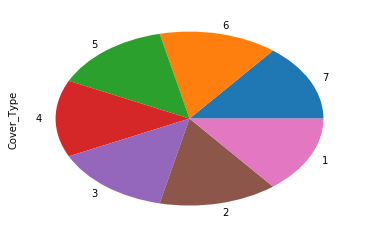

In [ ]:
plt.figure()
df['Cover_Type'].value_counts().plot.pie()
plt.show()

### Meaning of the variables

In [ ]:
# Information about the forest geography
geography = df.iloc[:,1:11]
geography.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,2881,130,22,210,54,1020,250,221,88,342
1,3005,351,14,242,-16,1371,194,215,159,842
2,3226,63,14,618,2,1092,232,210,107,2018
3,3298,317,8,661,60,752,198,233,174,1248
4,3080,35,6,175,26,3705,219,227,144,2673


In [ ]:
# Information about the nature o forest
Wildness = df.iloc[:,11:15]
Wildness.head()

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,1,0,0,0
1,0,0,1,0
2,1,0,0,0
3,0,1,0,0
4,1,0,0,0


In [ ]:
# Information on the geology and prevailing climate of the forests
soils = df.iloc[:,15:-1]
soils.head()

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Quantitative variables

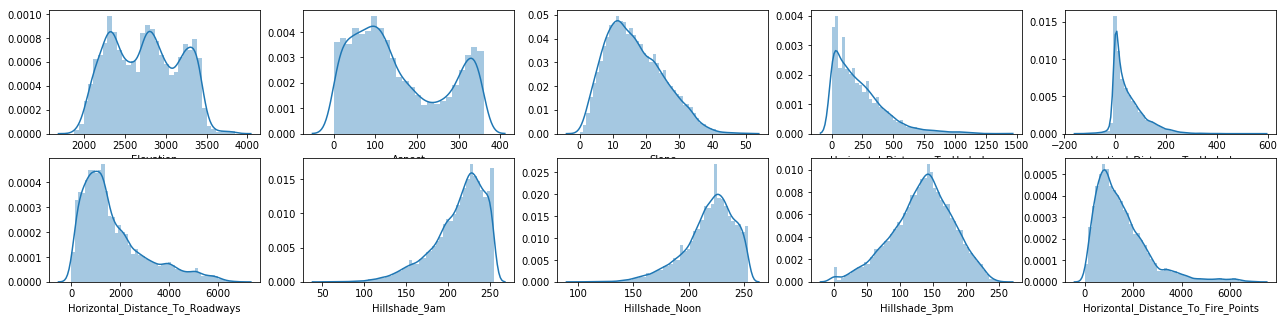

In [ ]:
i=0
plt.figure(figsize=(22,5))
for col in geography:
    i=i+1
    plt.subplot(2,5,i)
    sns.distplot(geography[col])
plt.show()

## Wilderness variables

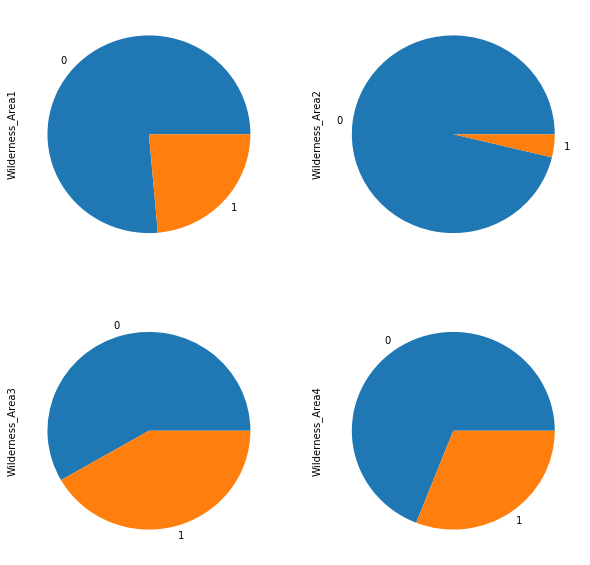

In [ ]:
i=0
plt.figure(figsize=(10,10))
for col in Wildness:
    i=i+1
    plt.subplot(2,2,i)
    Wildness[col].value_counts().plot.pie()

## Soils types variables

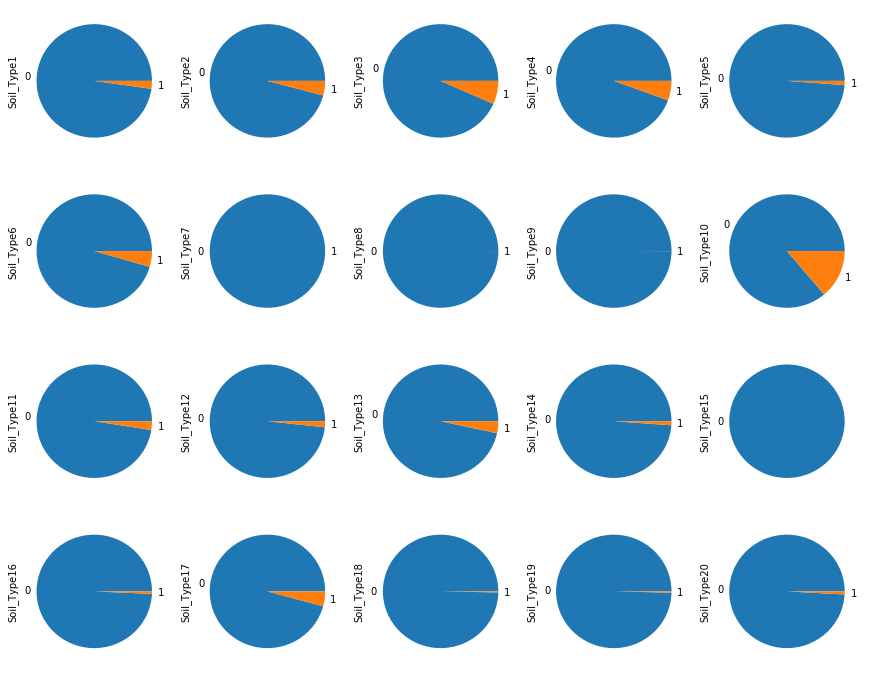

In [ ]:
i=0
plt.figure(figsize=(15,12))
for col in soils:
    i=i+1
    if(i==21):
        break
    plt.subplot(4,5,i)
    soils[col].value_counts().plot.pie()

### Variable/target relationships

### Creation of forest cover subsets

In [ ]:
classes=[]
for i in range(7):
    classes.append(df[df['Cover_Type'] == i+1])

### variables quantitative/ target

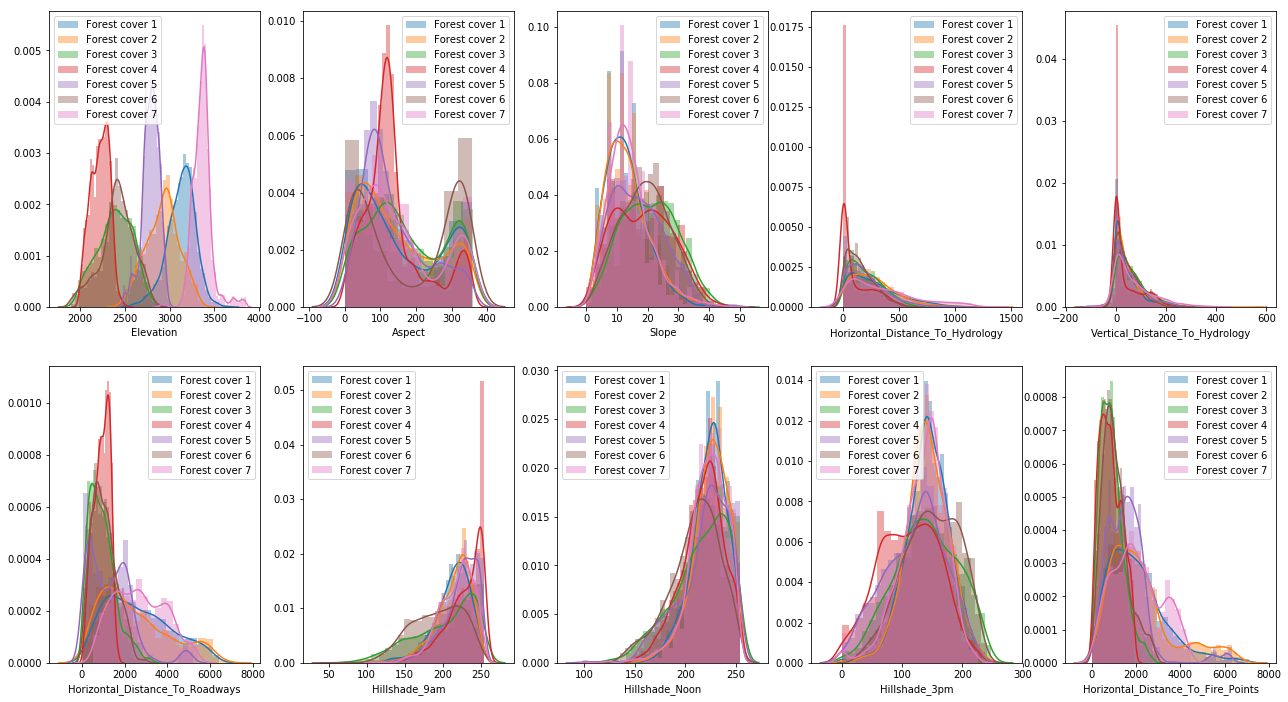

In [ ]:
i=0
plt.figure(figsize=(22,12))
for col in geography:
    i=i+1
    plt.subplot(2,5,i)
    for j in range(7):
        sns.distplot((classes[j])[col], label = 'Forest cover '+str(j+1))
    plt.legend(loc='best')
plt.show()

### Wildness/ target

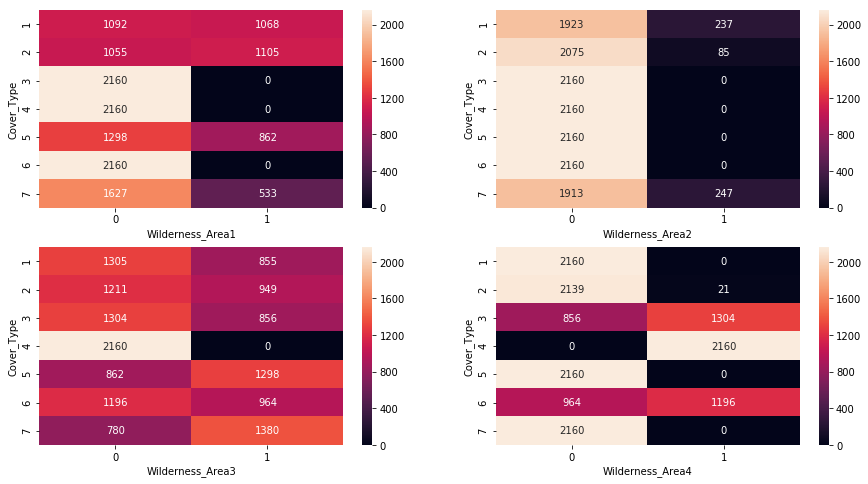

In [ ]:
i=0
plt.figure(figsize=(15,8))
for col in Wildness :
    i=i+1
    plt.subplot(2,2,i)
    sns.heatmap(pd.crosstab(df['Cover_Type'],df[col]),annot=True, fmt='d')

## Soils/ target

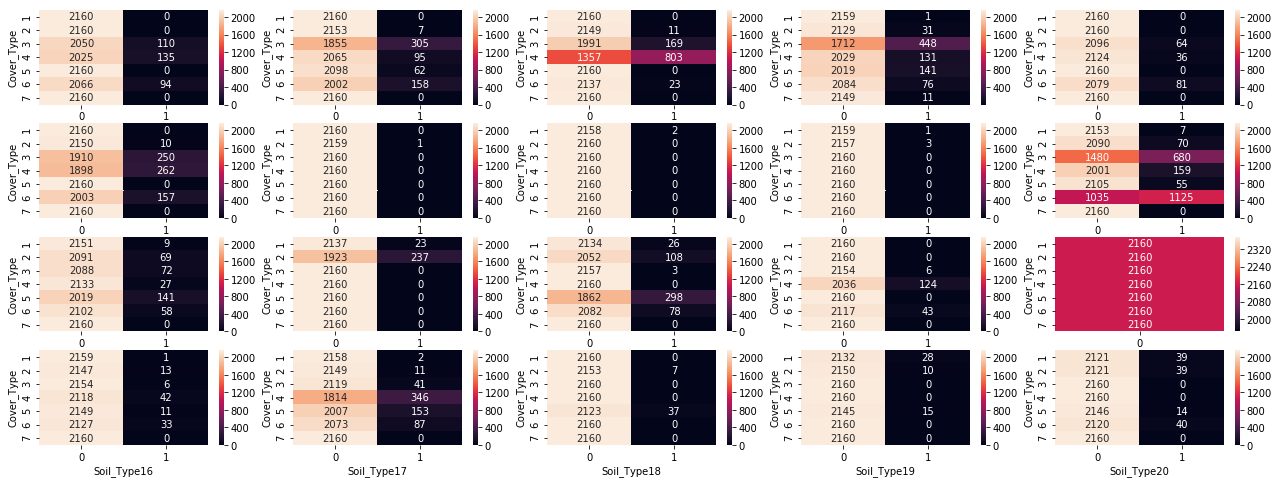

In [ ]:
i=0
plt.figure(figsize=(22,8))
for col in soils :
    i=i+1
    if(i==21):
        break
    plt.subplot(4,5,i)
    sns.heatmap(pd.crosstab(df['Cover_Type'],df[col]),annot=True, fmt='d')

## 1.2- Conclusion of the analysis and exploitation of the data

In view of the analysis that has been made, a list of models is emerging for test-training in order to achieve the objective defined beforehand. 

The basic models that we decide to test are drawn from the ensemblist methods; the randomForest, the Gradientboosting, and in a search for performance improvement, we were guided towards the extraTreesClassifier, these choices are motivated by the nature of the correlations that exist between the features and the target.

Our pre-processing will be oriented towards a feature engineering based on soil types. The approach will be as follows: we start by training the randomForest model, the gradientboosting and other classification models via a cross-validation without touching the basic data, the randomForest appears to be the most accurate. The randomForest is therefore the model of choice, even if the other models can be improved through feature engineering. Then we use the extraTreesClassifier to improve the performance of the prediction and reach the predefined objective.

## 2 - Pre-Processing

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [72]:
#importation of the important libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb

#for the splitting
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
#orthers libraries
import math
import scipy
import time
import gc

In [73]:
from google.colab import drive
drive.mount("/gdrive")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [74]:
cp="train.csv"
file_name = "/gdrive/MyDrive/forest_project/"+cp
data_ori=pd.read_csv(file_name)
test_data_origi=pd.read_csv("/gdrive/MyDrive/forest_project/test-full.csv")

## 2-1- Model search without feature engenering

In [78]:
data=data_ori
data=data.set_index(["Id"])
y_train=data["Cover_Type"]
x_train=data.drop("Cover_Type", axis=1)

## Trying of the KNN model

In [84]:
cross_val_score(KNeighborsClassifier(),x_train,y_train,cv=5,scoring="accuracy")

array([0.79530423, 0.80324074, 0.8151455 , 0.8098545 , 0.79993386])

## Trying of the GradientBoostingClassifier

## Trying of the xgboost

## Trying of the randomForest

In [81]:
cross_val_score(RandomForestClassifier(),x_train,y_train,cv=5,scoring="accuracy")

array([0.85582011, 0.8640873 , 0.85813492, 0.86011905, 0.85780423])

## 2-2-Useful function for future engener

We try to compute new future base on future understanding.
After we train a model and select the most relevant futures by future important of the model.

In [ ]:
dfeature_to_drop=[""]

In [ ]:
def misc_features(data):
    temp = data.copy()
    
    # we Use float64 for presition 
    for col, dtype in temp.dtypes.iteritems():
        if dtype.name.startswith('float'):
            temp[col] = temp[col].astype('float64')
            
    # here we compute a new feature base on future auderstanding 
    temp['Horizontal_Distance_To_Roadways_Log'] = [math.log(v+1) for v in temp['Horizontal_Distance_To_Roadways']] # log data give sometime 
    temp['Water Elevation'] = temp['Elevation'] - temp['Vertical_Distance_To_Hydrology']
    temp['Hydro_Fire_1'] = temp['Horizontal_Distance_To_Hydrology'] + temp['Horizontal_Distance_To_Fire_Points']
    temp['Hydro_Fire_2'] = abs(temp['Horizontal_Distance_To_Hydrology'] - temp['Horizontal_Distance_To_Fire_Points'])
    temp['Hydro_Road_1'] = abs(temp['Horizontal_Distance_To_Hydrology'] + temp['Horizontal_Distance_To_Roadways'])
    temp['Hydro_Road_2'] = abs(temp['Horizontal_Distance_To_Hydrology'] - temp['Horizontal_Distance_To_Roadways'])
    temp['Fire_Road_1'] = abs(temp['Horizontal_Distance_To_Fire_Points'] + temp['Horizontal_Distance_To_Roadways'])
    temp['Fire_Road_2'] = abs(temp['Horizontal_Distance_To_Fire_Points'] - temp['Horizontal_Distance_To_Roadways'])
    temp['EHiElv'] = temp['Horizontal_Distance_To_Roadways'] * temp['Elevation']
    temp['EVDtH'] = temp.Elevation - temp.Vertical_Distance_To_Hydrology
    temp['EHDtH'] = temp.Elevation - temp.Horizontal_Distance_To_Hydrology * 0.2
    temp['Elev_3Horiz'] = temp['Elevation'] + temp['Horizontal_Distance_To_Roadways']  + temp['Horizontal_Distance_To_Fire_Points'] + temp['Horizontal_Distance_To_Hydrology']
    temp['Elev_Road_1'] = temp['Elevation'] + temp['Horizontal_Distance_To_Roadways']
    temp['Elev_Road_2'] = temp['Elevation'] - temp['Horizontal_Distance_To_Roadways']
    temp['Elev_Fire_1'] = temp['Elevation'] + temp['Horizontal_Distance_To_Fire_Points']
    temp['Elev_Fire_2'] = temp['Elevation'] - temp['Horizontal_Distance_To_Fire_Points']

    # Fill NA
    temp.fillna(0, inplace = True)
    
    # Downcast variables
    for col, dtype in temp.dtypes.iteritems():
        if dtype.name.startswith('int'):
            temp[col] = pd.to_numeric(temp[col], downcast ='integer')
        elif dtype.name.startswith('float'):
            temp[col] = pd.to_numeric(temp[col], downcast ='float')
    
    return temp

# Soil Type Feature Engineering

In this section we consider several new features based on the soil-type variables:

0. Categorical Encoding (40 columns -> 1 column)
1. Climatic Zone
2. Geologic Zone
3. Surface Cover
4. Rock Size
5. Interaction Terms
6. Drop Original (dimension reduction)

## ELU Codes

From the original data description, the soil type number is based on the USFS Ecological Landtype Units (ELUs). The ELU code contains further information about the soils including the climatic zone and geologic zone. Furthermore, each ELU code comes with a brief description from which we can extract further information about the surface cover (by rocks/boulders) and rock size.

In [ ]:
# we test two type of normalise function 
def absolute_maximum_scale(series):
    if series.abs().max()==0:
      return series
    return series / series.abs().max()

def min_max_scaling(series):
    if (series.max() - series.min())==0:
        return (series - series.min())
    return (series - series.min()) / (series.max() - series.min())
#for col in data.columns:
    #data[col] = absolute_maximum_scale(data[col])

    
def normalize(data):
  for col in data.columns:
    data[col] = min_max_scaling(data[col])
  return data

In [ ]:
# Mapping soil type to ELU code
ELU = {
    1:2702,2:2703,3:2704,4:2705,5:2706,6:2717,7:3501,8:3502,9:4201,
    10:4703,11:4704,12:4744,13:4758,14:5101,15:5151,16:6101,17:6102,
    18:6731,19:7101,20:7102,21:7103,22:7201,23:7202,24:7700,25:7701,
    26:7702,27:7709,28:7710,29:7745,30:7746,31:7755,32:7756,33:7757,
    34:7790,35:8703,36:8707,37:8708,38:8771,39:8772,40:8776
}
# we Encode all 40 soil type into one column, it is like a clustering into 40 cluster
def soil_clustering(input_temp):
    data = input_temp.copy()
    data['Soil_Type'] = 0
    for i in range(1,41):
        data['Soil_Type'] += i*data[f'Soil_Type{i}']
    return data


# we collect the climat zone information
def climatic_zone(input_temp):
    temp = input_temp.copy()
    temp['Climatic_Zone'] = input_temp['Soil_Type'].apply(
        lambda x: int(str(ELU[x])[0])
    )
    return temp

#we collect the geologic zone information
def geologic_zone(input_temp):
    temp = input_temp.copy()
    temp['Geologic_Zone'] = input_temp['Soil_Type'].apply(
        lambda x: int(str(ELU[x])[1])
    )
    return temp



def soiltype_interactions(data):
    temp = data.copy()
            
    temp['Soil_12_32'] = temp['Soil_Type32'] + temp['Soil_Type12']
    temp['Soil_Type23_22_32_33'] = temp['Soil_Type23'] + temp['Soil_Type22'] + temp['Soil_Type32'] + temp['Soil_Type33']
    
    temp['Soil29_Area1'] = temp['Soil_Type29'] + temp['Wilderness_Area1']
    temp['Soil3_Area4'] = temp['Wilderness_Area4'] + temp['Soil_Type3']
    
    temp['Climate_Area2'] = temp['Wilderness_Area2']*temp['Climatic_Zone'] 
    temp['Climate_Area4'] = temp['Wilderness_Area4']*temp['Climatic_Zone'] 
   
    
    # Fill NA
    temp.fillna(0, inplace = True)
    
    return temp
# since we have vertical and horizontaldistance we get the idea to compute ecludian distance
def other_selection(data):
  temp=data.copy()
  temp['Euclidian_Distance_To_Hydrology'] = (temp['Horizontal_Distance_To_Hydrology']**2 +temp['Vertical_Distance_To_Hydrology']**2)**0.5
  temp['Mean_Elevation_Vertical_Distance_Hydrology'] = (temp['Elevation'] + temp['Vertical_Distance_To_Hydrology'])/2
  temp['Mean_Distance_Hydrology_Firepoints'] = (temp['Horizontal_Distance_To_Hydrology'] +temp['Horizontal_Distance_To_Fire_Points'])/2
  temp['Mean_Distance_Hydrology_Roadways'] = (temp['Horizontal_Distance_To_Hydrology'] +temp['Horizontal_Distance_To_Roadways'])/2
  temp['Mean_Distance_Firepoints_Roadways'] = (temp['Horizontal_Distance_To_Fire_Points'] +temp['Horizontal_Distance_To_Roadways'])/2
  return temp

#the data engenering function that applied all above function on the data
def data_engener(data):
  train = data.copy()
  train=other_selection(train)
  train = misc_features(train)
  train = soil_clustering(train)
  train = climatic_zone(train)
  train = geologic_zone(train)
  train = soiltype_interactions(train)
  
  soil_features = [f'Soil_Type{i}' for i in range(1,41)]
  # we drop all soil_type futures, information of those feature are in soil_type future
  train.drop(columns = soil_features, inplace = True)
  drop_argument=feature_to_drop
  train.drop(columns = drop_argument, inplace = True)
  #train=train.sample(frac=1)
  return train

## 3 - Modeling

In [ ]:
data=data_ori
data=data.set_index(["Id"])

In [ ]:
train_data=data_engener(data)

In [ ]:
y_train=train_data["Cover_Type"]
x_train=train_data.drop("Cover_Type", axis=1)

we tested different parameters
n_estimators=200 is more better for random classification  and ExtraTreesClassifier

In [ ]:
cross_val_score(RandomForestClassifier(n_estimators=150, random_state=17, n_jobs=4),x_train,y_train,cv=5,scoring="accuracy")

array([0.8912037 , 0.89054233, 0.88822751, 0.89186508, 0.8885582 ])

In [ ]:
cross_val_score(ExtraTreesClassifier(n_estimators=200, random_state=17, n_jobs=10),x_train,y_train,cv=5,scoring="accuracy")

array([0.90079365, 0.90443122, 0.90310847, 0.90443122, 0.90839947])

In [ ]:
test_data=test_data_origi.set_index(["Id"])

In [ ]:
test_data=data_engener(test_data)

In [ ]:
data_train=data_ori.set_index(["Id"])
data_train=data_engener(data_train)
y_train=data_train["Cover_Type"]
x_train=data_train.drop("Cover_Type", axis=1)


In [ ]:
model =ExtraTreesClassifier(n_estimators=200, random_state=17, n_jobs=10)
model.fit(x_train,y_train)
y_predic=model.predict(test_data)

In [ ]:
feature=x_train.columns

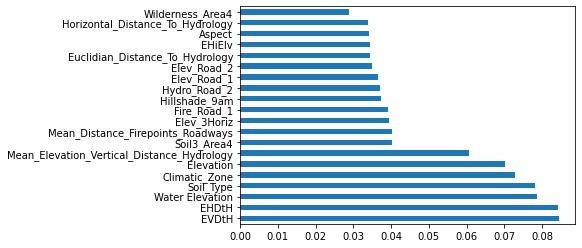

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
important=model.feature_importances_
print(important)
drop_argument=np.argsort(important)
print(feature[drop_argument[:20]])
print(important[drop_argument[:20]])

[0.05931173 0.0192067  0.01307697 0.01925222 0.01615556 0.01774496
 0.02097865 0.01595326 0.01538181 0.01636177 0.01328665 0.00191864
 0.01422374 0.02786749 0.01951729 0.04315163 0.0170391  0.01751346
 0.02013169 0.0168572  0.05580218 0.01682972 0.016614   0.01731443
 0.01958496 0.02038512 0.01710153 0.01812422 0.0614292  0.05871458
 0.02094694 0.01996897 0.01837336 0.01789567 0.01777554 0.05481122
 0.05594684 0.01238358 0.00570956 0.01221758 0.01097958 0.03205096
 0.00186416 0.01224558]
['Climate_Area2' 'Wilderness_Area2' 'Soil_12_32' 'Soil29_Area1'
 'Soil_Type23_22_32_33' 'Climate_Area4' 'Geologic_Zone' 'Slope'
 'Wilderness_Area1' 'Wilderness_Area3' 'Hillshade_3pm' 'Hillshade_Noon'
 'Vertical_Distance_To_Hydrology' 'Horizontal_Distance_To_Fire_Points'
 'Hydro_Fire_2' 'Hydro_Fire_1' 'Horizontal_Distance_To_Roadways_Log'
 'Mean_Distance_Hydrology_Firepoints' 'Fire_Road_2' 'Hydro_Road_1']
[0.00186416 0.00191864 0.00570956 0.01097958 0.01221758 0.01224558
 0.01238358 0.01307697 0.0132866

In [ ]:
feature_to_drop=feature[drop_argument[:24]]

In [ ]:
feature_to_drop

array(['Climate_Area2', 'Wilderness_Area2', 'Soil_12_32', 'Soil29_Area1',
       'Soil_Type23_22_32_33', 'Climate_Area4', 'Geologic_Zone', 'Slope',
       'Wilderness_Area1', 'Wilderness_Area3', 'Hillshade_3pm',
       'Hillshade_Noon', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Fire_Points', 'Hydro_Fire_2',
       'Hydro_Fire_1', 'Horizontal_Distance_To_Roadways_Log',
       'Mean_Distance_Hydrology_Firepoints', 'Fire_Road_2',
       'Hydro_Road_1', 'Mean_Distance_Hydrology_Roadways',
       'Horizontal_Distance_To_Roadways', 'Elev_Fire_2', 'Elev_Fire_1'],
      dtype=object)

In [ ]:
y_predic=pd.DataFrame(y_predic)
y_predic["Id"]=test_data.index
predic=pd.DataFrame()
predic['Id']=y_predic["Id"]
predic["Cover_Type"]=y_predic[0]
hello=predic.set_index("Id")
hello.to_csv("/gdrive/MyDrive/forest_project/prdic6.csv")